<a href="https://colab.research.google.com/github/sanmayphy/course-v3/blob/master/ImageSegmentation_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Make setting for plotting etc. 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Extract the relevant packages from fast.ai

In [0]:
import fastai
import numpy as np

### We will use the $fastai.vision$ function through the object $vs$

In [0]:
import fastai.vision as vs

### The $fastai.callbacks.hooks$ will be accessed through $hks$

In [0]:
import  fastai.callbacks.hooks as hks

### We will use the CAMVID dataset in built in fastai

In [5]:
path = vs.untar_data(vs.URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

### Setting the path for images and labels

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

### Get the path to actual images and labels

In [7]:
fnames = vs.get_image_files(path_img)
fnames[:2]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_007590.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00690.png')]

In [8]:
lbl_names = vs.get_image_files(path_lbl)
lbl_names[:2]

[PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03210_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_01110_P.png')]

### Let's visualize some input examples 

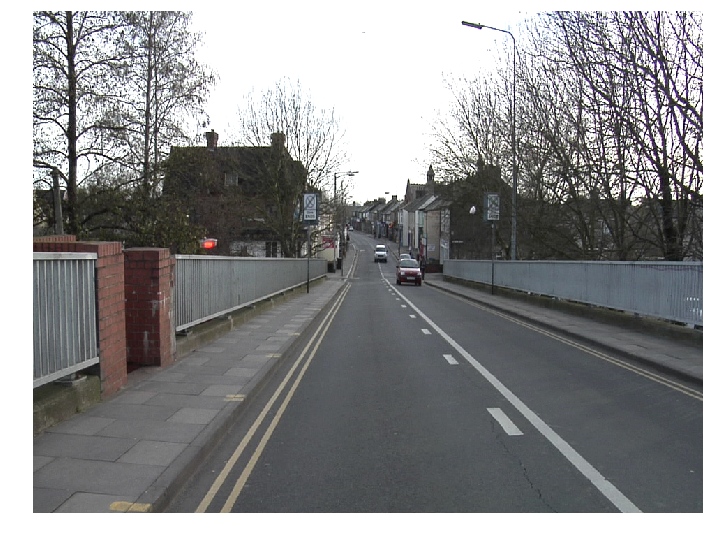

In [9]:
img_f = fnames[6]
img = vs.open_image(img_f)
img.show(figsize=(12,12))

### Q. What's the task ? Ans : $\bf We ~are ~ trying ~ to ~ assign~ labels~ to ~ each ~ pixel ~ in ~ the ~ image.$

Create a function which will return the label (from the label list) for any input image (from the image list)

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [11]:
fnames[6] ## --- test image under use --- #

PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03630.png')

In [12]:
get_y_fn(fnames[6]) ## ----- the label returned by the get_y_fn ----- ##

PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f03630_P.png')

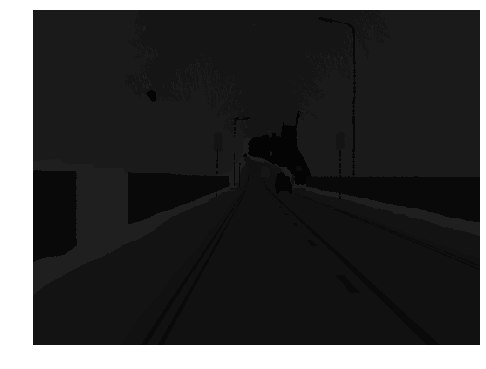

In [13]:
img_label = vs.open_image(get_y_fn(img_f))
img_label.show(figsize=(8,8))

### The $vs.open\_mask$ function assigns integer labels to each pixel in the label-image

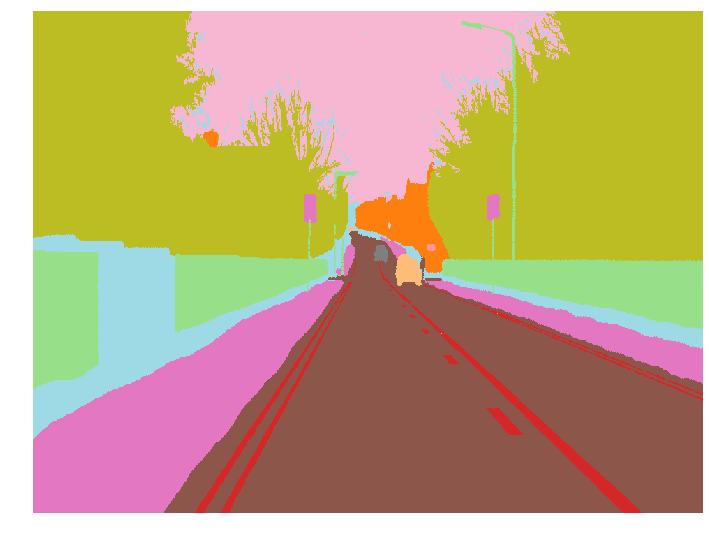

In [14]:
mask = vs.open_mask(get_y_fn(img_f))
mask.show(figsize=(12,12), alpha=1)

In [0]:
# vs.open_mask??
# cat /usr/local/lib/python3.6/dist-packages/fastai/vision/image.py

### How the masked image numerically looks like? Compare it with the original image

In [16]:
type(mask)

fastai.vision.image.ImageSegment

In [17]:
mask.data, mask.shape

(tensor([[[26, 26, 26,  ..., 26, 26, 26],
          [26, 26, 26,  ..., 26, 26, 26],
          [26, 26, 26,  ..., 26, 26, 26],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]), torch.Size([1, 720, 960]))

In [18]:
img.data, img.shape

(tensor([[[0.7059, 0.6784, 0.7804,  ..., 1.0000, 1.0000, 1.0000],
          [0.5804, 0.6118, 0.7490,  ..., 1.0000, 1.0000, 1.0000],
          [0.8392, 0.7451, 0.7451,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.3686, 0.3686, 0.3686,  ..., 0.2980, 0.2980, 0.3098],
          [0.3647, 0.3647, 0.3686,  ..., 0.3059, 0.3059, 0.3137],
          [0.3647, 0.3647, 0.3647,  ..., 0.3059, 0.3020, 0.3098]],
 
         [[0.7098, 0.6824, 0.7882,  ..., 1.0000, 1.0000, 1.0000],
          [0.5882, 0.6196, 0.7608,  ..., 1.0000, 1.0000, 1.0000],
          [0.8627, 0.7686, 0.7686,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.3686, 0.3686, 0.3686,  ..., 0.3176, 0.3176, 0.3294],
          [0.3686, 0.3686, 0.3725,  ..., 0.3294, 0.3294, 0.3373],
          [0.3686, 0.3686, 0.3686,  ..., 0.3294, 0.3255, 0.3333]],
 
         [[0.7804, 0.7529, 0.8471,  ..., 1.0000, 0.9922, 1.0000],
          [0.6392, 0.6706, 0.7922,  ..., 1.0000, 1.0000, 1.0000],
          [0.8706, 0.7765, 0.7608,  ...,

### Now let's look into the list of pre-defined labels

In [19]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

### Start creating the data batch

In [0]:
src_size = np.array(mask.shape[1:])
size = src_size//2
bs=8

In [0]:
src = (vs.SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [0]:
## --- do the pre-processing and normalize to imagenet stats --- ##
data = (src.transform(vs.get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs, num_workers=0)
        .normalize(vs.imagenet_stats))

In [23]:
path.ls()[1]

PosixPath('/root/.fastai/data/camvid/valid.txt')

In [24]:
src ## -- the stats of the labels -- ##

LabelLists;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Test: None

In [25]:
data ## -- the stats of the data -- ##

ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Test: None

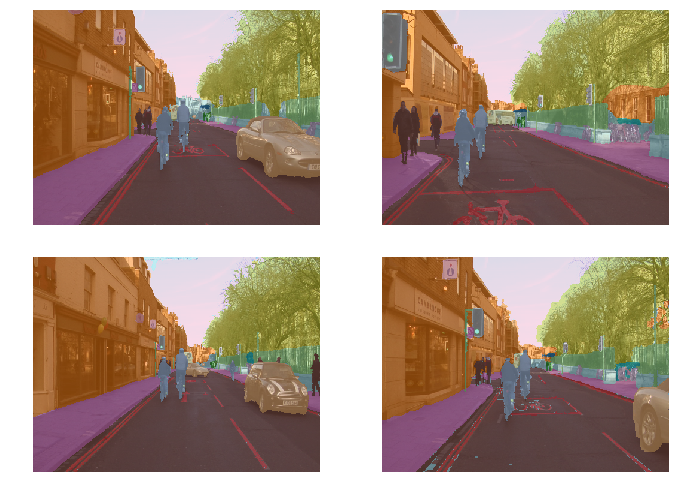

In [45]:
data.show_batch(rows=2, figsize=(10,7), ds_type=vs.DatasetType.Valid)

In [0]:
## --- assign an integer label to each of the classes --- ##
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

## --- designe a customized accuracy function --- #
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [28]:
name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [0]:
metrics=acc_camvid
wd=1e-2

### Create the learner from fastai unet_learner

In [0]:
learn = vs.unet_learner(data, vs.models.resnet34, metrics=metrics, wd=wd)

### Run the learning rate finder 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


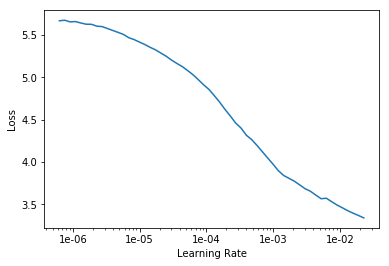

In [31]:
vs.lr_find(learn)
learn.recorder.plot()

### Do the training for 10 epochs and see the output results

In [32]:
learn.fit_one_cycle(10, slice(1e-06,1e-03), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.703850,1.047892,0.768730,02:27
1,1.016003,0.775184,0.827044,02:25
2,0.774207,0.589622,0.847835,02:25
3,0.666186,0.617470,0.832526,02:25
4,0.618190,0.551147,0.856760,02:24
5,0.589966,0.578110,0.840546,02:25
6,0.591114,0.471656,0.860010,02:24
7,0.536854,0.465017,0.867209,02:23
8,0.487670,0.427243,0.876086,02:23
9,0.419072,0.325456,0.906522,02:23


In [0]:
path = "."

In [0]:
learn.save('stage-1')

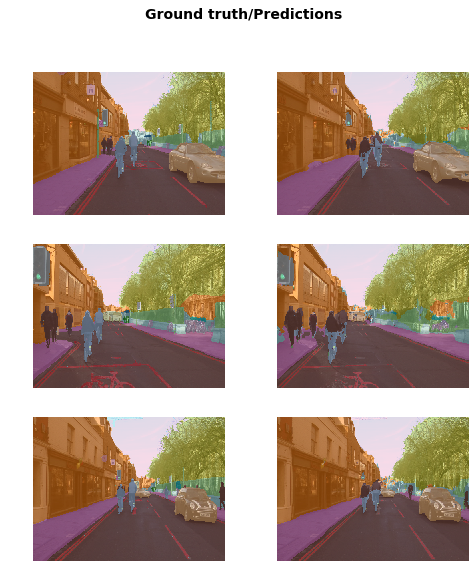

In [35]:
learn.show_results(rows=3, figsize=(8,9))


### Now let all the pre trained weights float 

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


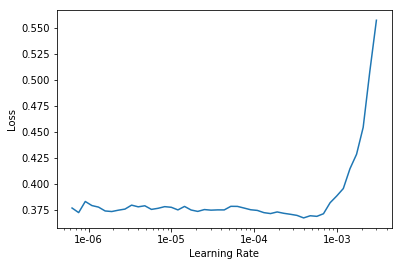

In [38]:
vs.lr_find(learn)
learn.recorder.plot()


In [39]:
learn.fit_one_cycle(20, slice(1e-5,1e-4), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.361916,0.308922,0.911074,02:25
1,0.359907,0.305837,0.910783,02:27
2,0.350632,0.303429,0.911231,02:27
3,0.352737,0.299620,0.913652,02:27
4,0.347065,0.291758,0.917582,02:28
5,0.342905,0.291064,0.916151,02:27
6,0.335785,0.292273,0.914311,02:27
7,0.322760,0.301609,0.910703,02:27
8,0.313943,0.285247,0.917493,02:27
9,0.313203,0.279478,0.920304,02:27


In [0]:
learn.save('stage-2')

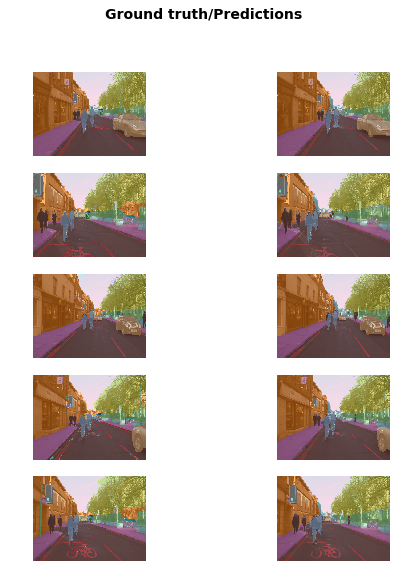

In [41]:
learn.show_results(rows=5, figsize=(8,9))